In [2]:
import torch

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set_style('darkgrid',
                {'axes.facecolor': '.2',
                'figure.facecolor': '0.1',
                'text.color': '.9',
                'grid.color': '.5',
                'xtick.color': '.9',
                'ytick.color': '.9'})

In [29]:
T = 1
M = 500
n_sim = 1000
prob = 0.5
u = 1.05
d = 1.0/u
spot = 50.0
strike = 70.0
rate = 0.01
t = torch.linspace(0,1, M)

In [30]:
p = torch.ones((n_sim,M))*prob

In [31]:
tn = torch.bernoulli(p)
tn[tn==0] = d
tn[tn==1] = u 
tn = torch.cumprod(tn, dim=1)

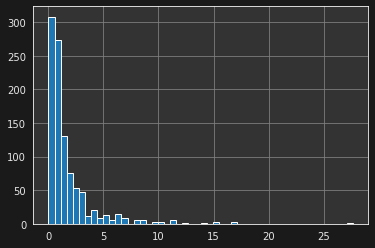

In [32]:
plt.hist(tn[:,-1].numpy(), bins=50)
plt.show()

In [33]:
prices = spot*tn

/tmp/ipykernel_12239/1247268046.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C2" (-> color=(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)). The keyword argument will take precedence.
  plt.plot(t.numpy(), strike*torch.ones_like(t).numpy(),'C2',markersize=30, label=f'K = {strike}', color='black')


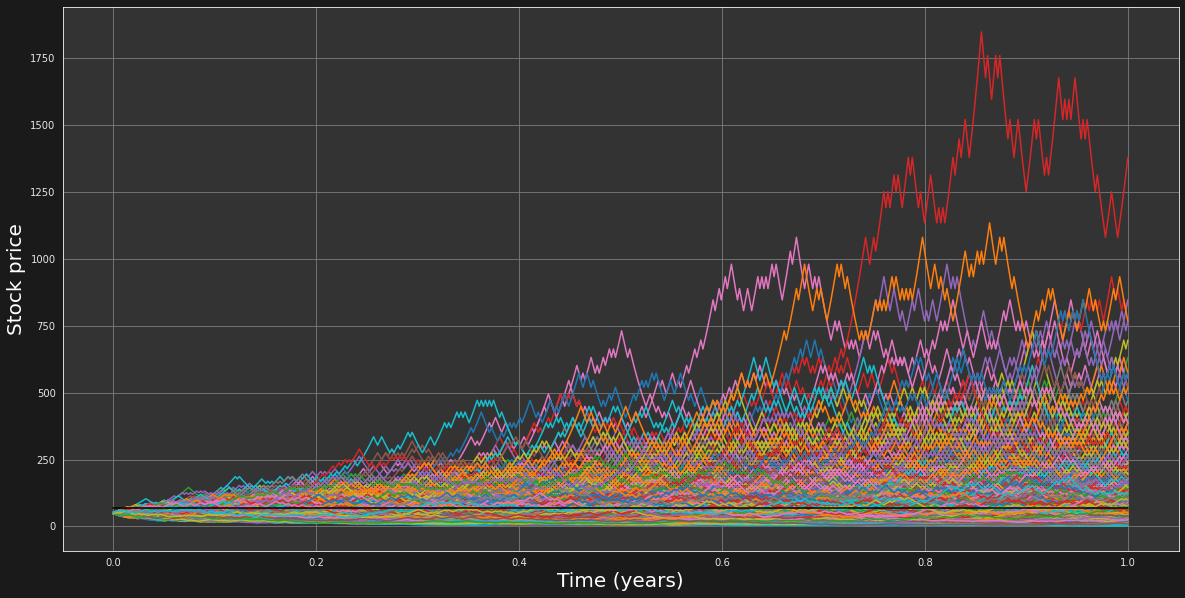

In [35]:
plt.figure(figsize=(20,10))
plt.plot(t.numpy(), prices.numpy().T)
plt.plot(t.numpy(), strike*torch.ones_like(t).numpy(),'C2',markersize=30, label=f'K = {strike}', color='black')
plt.xlabel('Time (years)', color='white', fontsize=20)
plt.ylabel('Stock price', color='white', fontsize=20)
plt.show()

In [11]:
prices = spot*tn

In [23]:

payoff  = torch.max(prices, 0).values

In [24]:
payoff

tensor([  52.5000,   55.1250,   57.8812,   60.7753,   63.8141,   67.0048,
          70.3550,   73.8727,   77.5664,   73.8727,   77.5664,   81.4447,
          77.5664,   81.4447,   85.5169,   89.7928,   94.2824,   89.7928,
          94.2824,   98.9965,  103.9463,   98.9965,   94.2824,   98.9965,
          94.2824,   98.9965,   94.2824,   98.9965,  103.9463,   98.9965,
         103.9463,  109.1436,  103.9463,  109.1436,  114.6008,  120.3308,
         126.3474,  132.6647,  139.2979,  146.2628,  139.2979,  132.6647,
         126.3473,  132.6647,  139.2979,  146.2628,  139.2979,  146.2628,
         153.5759,  161.2547,  153.5759,  161.2547,  153.5759,  161.2547,
         153.5759,  161.2547,  153.5759,  161.2547,  169.3174,  161.2547,
         169.3174,  161.2547,  169.3174,  161.2547,  169.3174,  177.7833,
         169.3174,  177.7833,  186.6724,  196.0060,  205.8063,  196.0060,
         205.8063,  196.0060,  205.8063,  196.0060,  186.6724,  196.0060,
         205.8063,  196.0060,  205.806

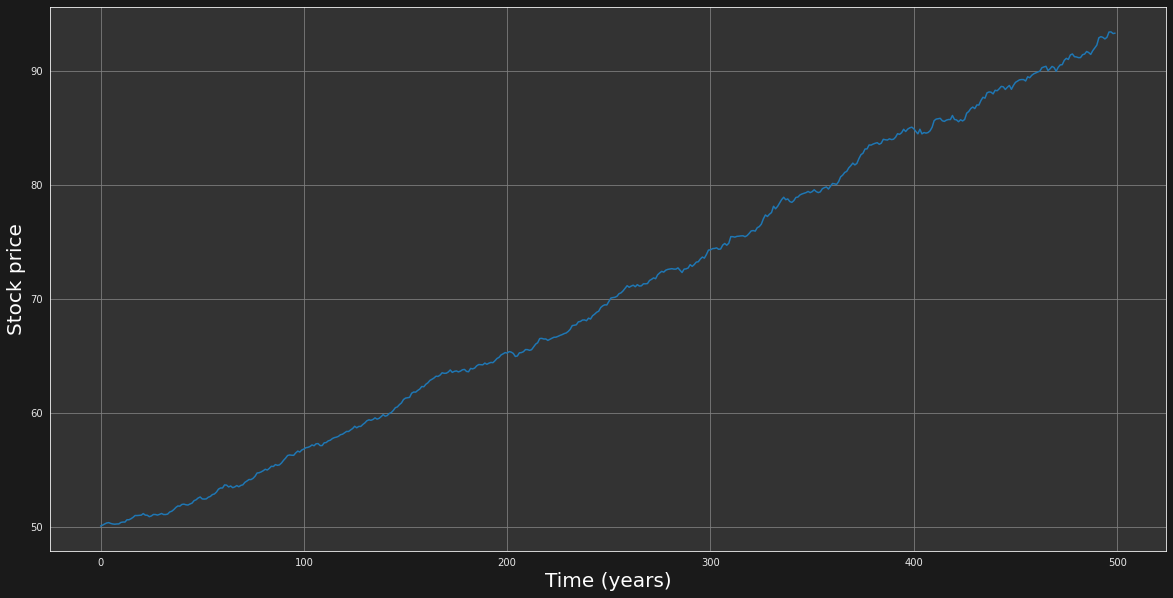

In [17]:
plt.figure(figsize=(20,10))
plt.plot(torch.mean(prices,  dim = 0 ).numpy() *  torch.exp(-rate*t).numpy())
plt.xlabel('Time (years)', color='white', fontsize=20)
plt.ylabel('Stock price', color='white', fontsize=20)
plt.show()

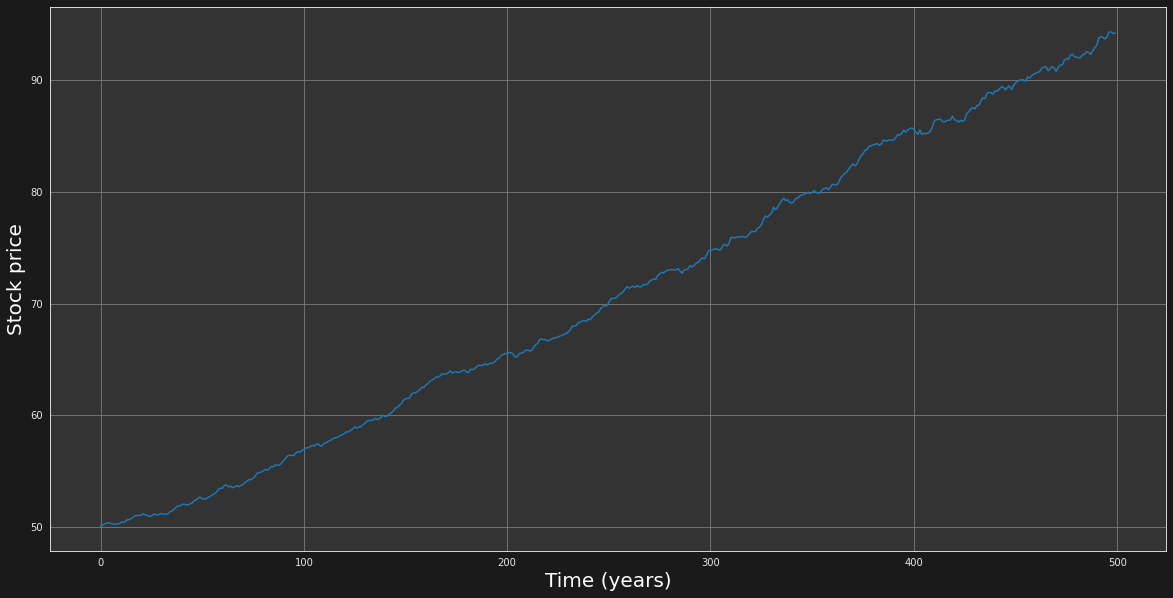

In [18]:
plt.figure(figsize=(20,10))
plt.plot(torch.mean(prices,  dim = 0 ).numpy())
plt.xlabel('Time (years)', color='white', fontsize=20)
plt.ylabel('Stock price', color='white', fontsize=20)
plt.show()

In [ ]:
normal = torch.distributions.Normal(0,1)
N = normal.cdf
logNp = normal.log_prob